# 数字图像处理实验3

实验要求:

- 将wukong.jpg中的内容，通过几何变换贴到board1.jpg和board2.jpg中的某张海报墙上

- 自己选一张图片，重复如上操作

- 要求编程实现，而不是手工处理


实现思路：

    手动找出海报墙四个点的坐标，以此截取ROI，运用透视变换转化图像，最后仿照上次实验的方法拼合在一起

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
board = cv2.imread("board2.jpg")
wukong = cv2.imread("wukong.jpg")

In [70]:
pts = np.array([[1942,1065],[1961,1794],[2705,1794],[2677,927]],dtype=np.int32)

x:1942 y:927 h:1794 w:2705


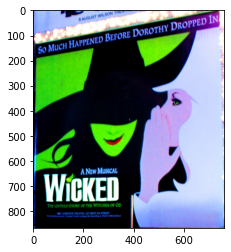

In [71]:
x,y = np.amin(pts,axis=0)
w,h = np.amax(pts,axis=0)
print(f"x:{x} y:{y} h:{h} w:{w}")
roi = board[y:h,x:w]
plt.imshow(roi[:,:,::-1])

(867, 763) 763 867
(867, 763)


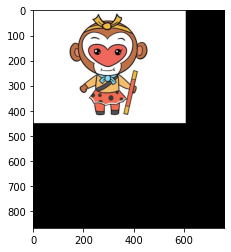

In [72]:
print(roi.shape[:2],w-x,h-y)
canvas = np.zeros((h-y,w-x,3), np.uint8)
rows, cols = wukong.shape[:2]
canvas[0:rows,0:cols]=wukong
print(canvas.shape[:2])
plt.imshow(canvas[:,:,::-1])

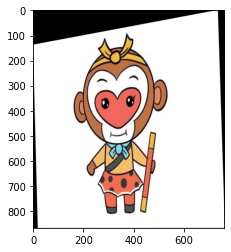

In [73]:
pts1 = np.float32([[0, 0], [0,rows],[cols,rows], [cols, 0]])
pts2 = np.float32((pts-np.array([x,y])))
M = cv2.getPerspectiveTransform(pts1, pts2)
# print(M)
ft = cv2.warpPerspective(canvas, M,(w-x,h-y))
plt.imshow(ft[:,:,::-1])

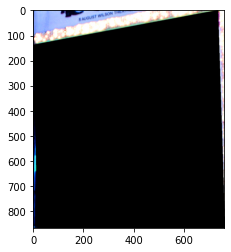

In [74]:
cv2.fillPoly(roi, [np.int32(pts2.reshape((-1,1,2)))], (0,0,0))
plt.imshow(roi[:,:,::-1])

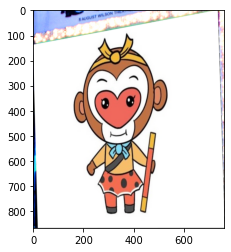

In [75]:
res = cv2.add(roi,ft)
plt.imshow(res[:,:,::-1])

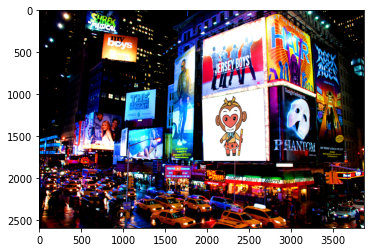

In [76]:
board[y:h,x:w] = res
plt.imshow(board[:,:,::-1])

**彩蛋**

吃我封装了，哈哈哈哈哈！！！

In [77]:
def 一键缝合(pts,src,dst):
    '''
    pts:输入四个点坐标
    src:源图片
    dst:要贴上去的图片
    '''
    x,y = np.amin(pts,axis=0)
    w,h = np.amax(pts,axis=0)
    roi = src[y:h,x:w]
    canvas = np.zeros((h-y,w-x,3), np.uint8)
    rows, cols = dst.shape[:2]
    canvas[0:rows,0:cols]=dst
    pts1 = np.float32([[0, 0], [0,rows],[cols,rows], [cols, 0]])
    pts2 = np.float32((pts-np.array([x,y])))
    M = cv2.getPerspectiveTransform(pts1, pts2)
    ft = cv2.warpPerspective(canvas, M, (w-x,h-y))
    cv2.fillPoly(roi, [np.int32(pts2.reshape((-1,1,2)))], (0,0,0))
    roi = cv2.add(roi,ft)
    src[y:h,x:w] = roi
    return src